# Simple Milky Way model with OMEGA+

This notebook explains the key input parameters that can be used to build a simple Milky Way model with OMEGA+. It also shows some of the observational constraints that you can use to calibrate your model.

In [2]:
# Import python modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import the OMEGA+ module
from JINAPyCEE import omega_plus

#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

## OMEGA+ Milky Way model

## 1. General Prescriptions

OMEGA+ is a 2-zone chemical evolution model that include a central galaxy surrounded by a hot gas reservoir representing the circumgalactic medium (CGM).  The central galaxy is a one-zone <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">OMEGA</a> model, which is part of the <a href="https://github.com/NuGrid/NuPyCEE">NuPyCEE</a> package. The central OMEGA model is stored in the *inner* variable of OMEGA+.

- **Circumgalactic inflow**: Accretion of intergalactic gas into the circumgalactic medium.
- **Galactic inflow**: Accretion of circumgalactic gas into the interstellar (galactic) medium.
- **Star formation**: Convertion of galactic gas into stars.
- **Galactic outflow**: Ejection of galactic gas into the circumgalactic medium.
- **Circumgalactic outflow**: Ejection of circumgalactic gas into the intergalactic medium.

The evolution of the galactic gas mass ($M_{\rm gas}$) is defined as,

$$ \dot{M}_{\rm gas} = \dot{M}_{\rm g,in}  + \dot{M}_{\rm ej} - \dot{M}_\star - \dot{M}_{\rm g,out}, $$

where the four terms on the right-hand side are the inflow rate from the CGM into the galaxy ($\dot{M}_{\rm g,in}$), the combined mass-loss rate of all stars ($\dot{M}_{\rm ej}$), the star formation rate ($\dot{M}_\star$), and the outflow rate from the galaxy into the CGM ($\dot{M}_{\rm g,out}$).

The evolution of the circumgalactic medium, the mass of the hot gas reservoir surrounding the central galaxy, is defined by,

$$ \dot{M}_{\rm CGM}= \dot{M}_{\rm CGM,in} + \dot{M}_{\rm g,out} - \dot{M}_\mathrm{g,in} - \dot{M}_{\rm CGM,out}, $$

where $\dot{M}_{\rm CGM,in}$ is the inflow rate from the external medium into the CGM, and $\dot{M}_{\rm CGM,out}$ is the outflow rate from the CGM into the intergalactic medium, a component that is not tracked with OMEGA+.

In [2]:
# make a dictionary for our OMEGA+ runs
op_dict = {}

# run default OMEGA+ instance (with special_timesteps = 150)
op_default = omega_plus.omega_plus(special_timesteps = 150)
op_dict['Default'] = op_default

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.15s
   OMEGA+ run completed - Run time: 1.52s


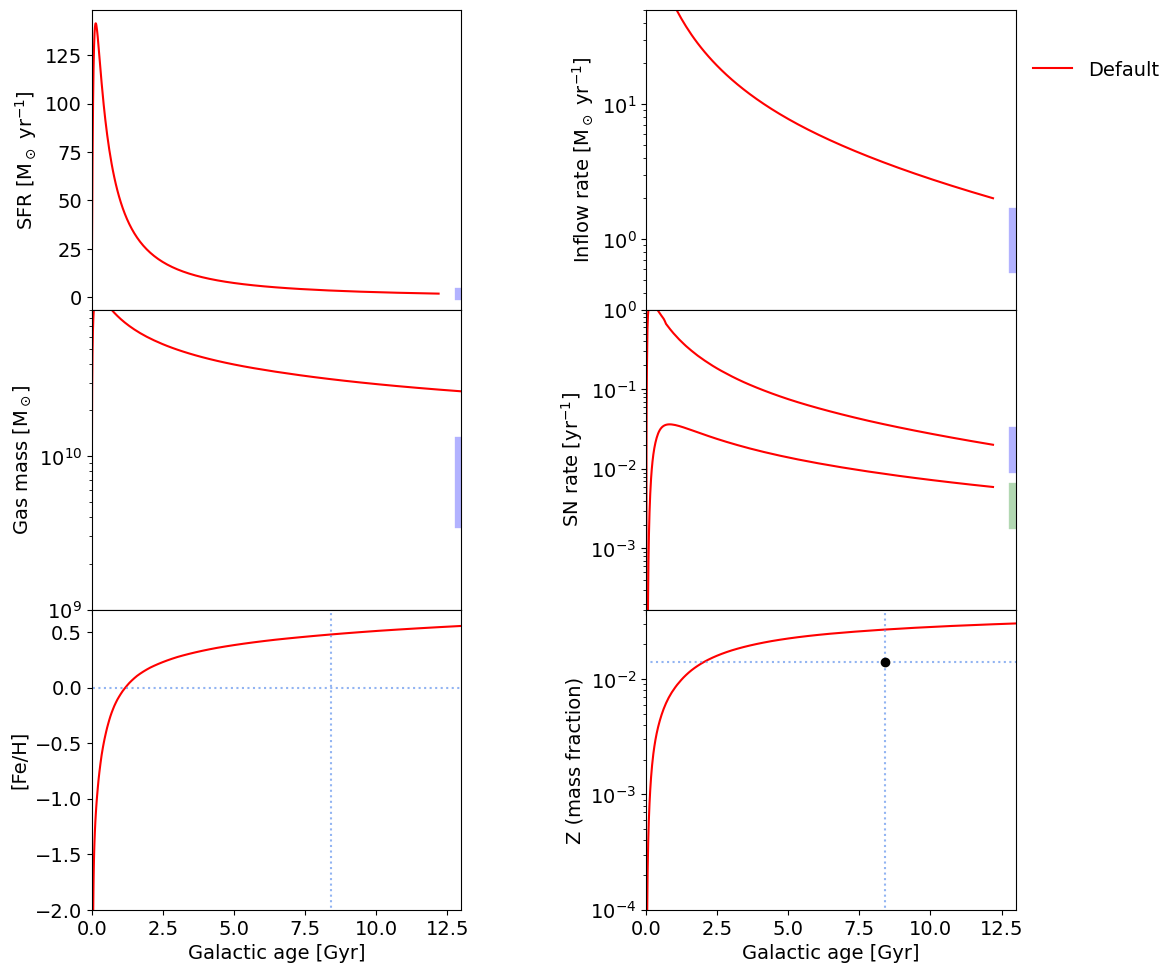

In [3]:
#%matplotlib nbagg

t_op = []
inflow_rate = []
m_gas = []
cc_sne_rate = []
Ia_sne_rate = []
m_star_lost =[]
i=0
j=0
k=0
for key,val in op_dict.items():    
    # OMEGA+ time array
    t_op.append(np.array(val.inner.history.age)/1.0e9)

    # Get the inflow rates [Msun/yr]
    inflow_rate.append(val.inner.m_inflow_t/list(op_dict.values())[0].inner.history.timesteps) 
    
    # Get the total mass of gas [Msun]
    m_gas.append([])
    m_gas[i] = np.zeros(val.inner.nb_timesteps+1)
    for i_t in range(val.inner.nb_timesteps+1):
        m_gas[i][i_t] = sum(val.inner.ymgal[i_t])
    i+=1
    
    # Get the total mass lost by stars [Msun]
    m_star_lost.append([])
    m_star_lost[j] = 0.0
    for i_t in range(val.inner.nb_timesteps):
        m_star_lost[j] += np.sum(val.inner.mdot[i_t])
    j+=1
    
    # Get the CC and Ia SNe rates [yr^-1]
    cc_sne_rate.append(val.inner.history.sn2_numbers[1:]/val.inner.history.timesteps) 
    Ia_sne_rate.append(val.inner.history.sn1a_numbers[1:]/val.inner.history.timesteps) 
    k+=1

plt.close()
# Figure frame
%matplotlib inline
al_f = 14 # text font
matplotlib.rcParams.update({'font.size': 14.})
f, axarr = plt.subplots(3, 2, figsize=(12,12), sharex=True, sharey=False) # [row][col]
f.subplots_adjust(hspace=0.)
f.subplots_adjust(wspace=0.5)
colors = ['r','k','blue','black'
         ]

linestyles = ['-','-.',':',':'
             ]

labels = []

# Plot SFR
i=0
axarr[0][0].plot([12.9,12.9], [0.65,3.0], linewidth=6, color='b', alpha=0.3)
for key,val in op_dict.items():
    axarr[0][0].plot(t_op[i][:-1], val.inner.history.sfr_abs[:-1], colors[i], ls=linestyles[i],linewidth=1.5)
    i+=1

# Plot inflows
i=0
axarr[0][1].plot([12.9,12.9], [0.6,1.6], linewidth=6, color='b', alpha=0.3)
for key,val in op_dict.items():
    axarr[0][1].plot(t_op[i][:-1], inflow_rate[i], colors[i],ls=linestyles[i], linewidth=1.5)
    i+=1
    
# Plot gas mass
i=0
axarr[1][0].plot([12.9,12.9], [3.6e9,12.6e9], linewidth=6, color='b', alpha=0.3)
for key,val in op_dict.items():
    axarr[1][0].plot(t_op[i], m_gas[i], colors[i],ls=linestyles[i], linewidth=1.5)
    i+=1
    
# Plot SNe rates
i=0
axarr[1][1].plot([12.9,12.9], [1e-2,3e-2], linewidth=6, color='b', alpha=0.3)
axarr[1][1].plot([12.9,12.9], [0.2e-2,0.6e-2], linewidth=6, color='g', alpha=0.3)
for key,val in op_dict.items():
    axarr[1][1].plot(t_op[i][:-1], cc_sne_rate[i], colors[i], ls=linestyles[i],linewidth=1.5)
    axarr[1][1].plot(t_op[i][:-1], Ia_sne_rate[i], colors[i], ls=linestyles[i],label=key, linewidth=1.5)
    i+=1
axarr[1][1].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 1.8))
    
    
# Y-axis
axarr[0][0].set_ylabel('SFR [M$_\odot$ yr$^{-1}$]', fontsize=al_f)
axarr[0][1].set_ylabel('Inflow rate [M$_\odot$ yr$^{-1}$]', fontsize=al_f)
axarr[0][1].set_yscale('log')
axarr[0][1].set_ylim(3e-1,5e1)
axarr[1][0].set_ylabel('Gas mass [M$_\odot$]', fontsize=al_f)
axarr[1][0].set_yscale('log')
axarr[1][0].set_ylim(1e9,9e10)
axarr[1][1].set_ylabel('SN rate [yr$^{-1}$]', fontsize=al_f)
axarr[1][1].set_yscale('log')
axarr[1][1].set_ylim(1.7e-4,1e0)

# X-axis
axarr[1][1].set_xlim(0,13)



def plot_spectr(omega_run, solar_norm):
    return(omega_run.inner.plot_spectro(solar_norm=solar_norm, return_x_y=True))

time=[]
Fe=[]
# Extract predictions
for key, val in op_dict.items():
    time.append(plot_spectr(val, 'Lodders_et_al_2009')[0])
    Fe.append(plot_spectr(val, 'Lodders_et_al_2009')[1])

# Plot age-[Fe/H]
# ===============
i=0
for key, val in op_dict.items():
    axarr[2][0].plot(np.array(time[i])/1e9, Fe[i], colors[i], ls=linestyles[i], linewidth=1.5, label=key)
    i+=1

axarr[2][0].plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
axarr[2][0].plot([-1e10,1e10], [0,0], ':', color='cornflowerblue', alpha=0.7)
axarr[2][0].set_ylim(-2., 0.7)

i=0
for key, val in op_dict.items():
    axarr[2][1].plot(np.array(val.inner.history.age)/1e9, val.inner.history.metallicity, colors[i], ls=linestyles[i],linewidth=1.5)
    i+=1
           
axarr[2][1].plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
axarr[2][1].plot([-1e10,1e10], [0.014,0.014], ':', color='cornflowerblue', alpha=0.7)
axarr[2][1].set_yscale('log')
axarr[2][1].set_ylim(1e-4, 4e-2)
axarr[2][1].scatter([8.4],[0.014],color='k',zorder=10)

# Labels and visual aspect
axarr[2][0].set_ylabel('[Fe/H]', fontsize=al_f)
axarr[2][1].set_ylabel('Z (mass fraction)', fontsize=al_f)
axarr[2][1].set_xlabel('Galactic age [Gyr]', fontsize=al_f)
axarr[2][0].set_xlabel('Galactic age [Gyr]', fontsize=al_f)

# Adjust layout/white spaces
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.subplots_adjust(right=0.97)

### Let's examine some of the input parameters in our default model...

To acces information about the Galaxy (inner) component of our moel using the command "OMEGA_inst.inner." where OMEGA_inst is the name of our OMEGA+ model. Pressing the Tab -->| key, we can see a list of parameters that can be used to calibrate the model. As an example, in the cell below we check how inflow and outflows are implemented in the default model.

In [4]:
# The default OMEGA+ uses the in_out_control implementation, which directly connects
# the inflow rate to the outflow rate
print('Check in_out_control implementation:', op_dict['Default'].inner.in_out_control)

# We can also see that the default ratio between the inflow and outflow rate is 1
print('Ratio of inflow/outflow rates:', op_dict['Default'].inner.in_out_ratio)

print('======================================================================')

Check in_out_control implementation: True
Ratio of inflow/outflow rates: 1.0


The galactic outflow rate $\dot{M}_\mathrm{out}$ is tied to the star formation rate $\dot{M}_\star$ of the galaxy via the mass-loading factor $\eta$ (e.g., <a href="http://adsabs.harvard.edu/abs/2005ApJ...618..569M">Murray et al. 2005</a>)

$$ \eta \equiv \frac{\dot{M}_\mathrm{out}}{\dot{M}_\star} $$

#### Different mass-loading options

- `1:` Constant mass-loading factor
- `2:` Mass-dependent mass-loading (see <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">Côté et al. 2017</a>)
- `3:` Mass- and redshift-dependent mass-loading (see <a href="http://adsabs.harvard.edu/abs/2017ApJ...835..128C">Côté et al. 2017</a>)

In [5]:
# The magnitude of the outlfows depends on the mass loading factor factor, which we can see
# has a default value of 1.0
print('Ratio of inflow/outflow rates: ', op_dict['Default'].inner.mass_loading)
print('======================================================================')

Ratio of inflow/outflow rates:  1.0


### Exploring different Inflow options

There are 4 different inflow implementations that are available in OMEGA+: 

- `1:` Exponential equations
- `2:` Constant inflow timescale
- `3:` Inflow timescale proportional to free-fall timescale
- `4:` Input array

Let's now consider a double-exponential infall prescription as in <a href="https://ui.adsabs.harvard.edu/abs/1997ApJ...477..765C">Chiappini et al. 1997</a>, where the first and second infalls are responsible for making the thick and thin disk, respectively. Each inflow episode is described by

$$ \dot{M}_\mathrm{inflow}(t)=N_\mathrm{norm}\mathrm{exp}\left(\frac{(t_0-t)}{\tau}\right).$$

The code will then use the equation to calculate the inflow rate, regardless of the amount of gas inside the circumgalactic medium.  OMEGA+ can combine an arbitrary number of exponential equations, where the inflow array is defined as:

**`exp_infall[ number of exp equations ][ i ]`**

- `i = 0:`  $N_\mathrm{norm}$
- `i = 1:`  $t_0$ (time of maximum accretion)
- `i = 0:`  $\tau$ (timescale for disk formation)

In [37]:
#############################################################################
############### \\\\\\\\\\\\\\\ MODIFY BELOW //////////////// ###############
#############################################################################
# first infall parameters
N_1 = 55 # 55
t_01 = 0
tau_1 = 0.2e9

# second infall parameters
N_2 = 8
t_02 = 4.0e9
tau_2 = 5e9
#############################################################################
#############################################################################

exp_2infall = [[N_1,t_01,tau_1], [N_2,t_02,tau_2]]

# run the model with exp double-infall
op_exp = omega_plus.omega_plus(special_timesteps=150, 
                                   exp_infall=exp_2infall,)
op_dict['Two-infall']=op_exp

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.14s
   OMEGA+ run completed - Run time: 1.49s


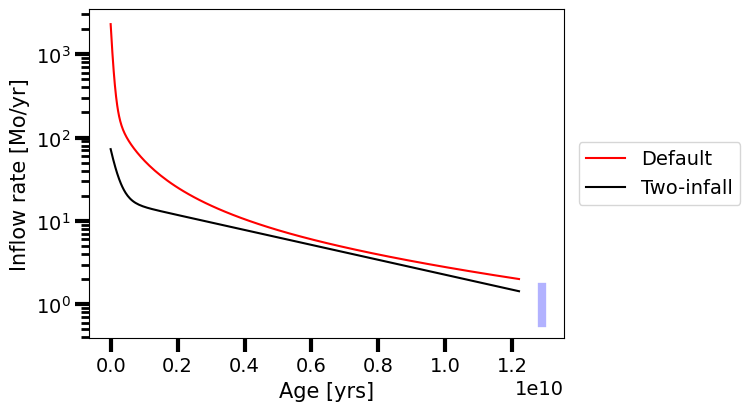

In [38]:
# Plot the inflow rate for the models.
#%matplotlib nbagg
colors = ['r','k','b','k'
         ]

linestyles = ['-','-',':',':'
             ]

i=0
for name,run in op_dict.items():
    run.inner.plot_inflow_rate(label=name, color=colors[i], shape=linestyles[i], marker='None')
    i+=1
plt.yscale('log')
plt.plot([12.9e9,12.9e9], [0.6,1.6], linewidth=6, color='b', alpha=0.3)

### [Fe/H]

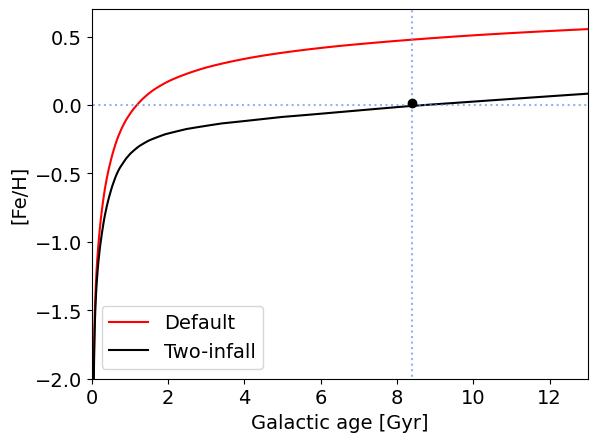

In [39]:
#%matplotlib nbagg

def plot_spectr(omega_run, solar_norm):
    return(omega_run.inner.plot_spectro(solar_norm=solar_norm, return_x_y=True))

time=[]
Fe=[]
# Extract predictions
for key, val in op_dict.items():
    time.append(plot_spectr(val, 'Lodders_et_al_2009')[0])
    Fe.append(plot_spectr(val, 'Lodders_et_al_2009')[1])

# Plot age-[Fe/H]
# ===============
i=0
for key, val in op_dict.items():
    plt.plot(np.array(time[i])/1e9, Fe[i], colors[i], ls=linestyles[i], linewidth=1.5, label=key)
    i+=1

plt.plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
plt.plot([-1e10,1e10], [0,0], ':', color='cornflowerblue', alpha=0.7)
plt.ylim(-2., 0.7)
plt.xlim(0,13)
plt.scatter([8.4],[0.014],color='k',zorder=10)

plt.ylabel('[Fe/H]', fontsize=al_f)
plt.xlabel('Galactic age [Gyr]', fontsize=al_f)
plt.legend()

### Metallicity

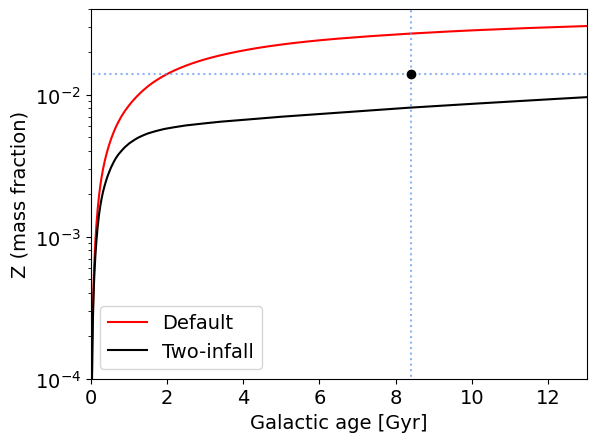

In [40]:
#%matplotlib nbagg

i=0
for key, val in op_dict.items():
    plt.plot(np.array(val.inner.history.age)/1e9, val.inner.history.metallicity, colors[i], label=key,
             ls=linestyles[i],linewidth=1.5)
    i+=1
    
plt.plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
plt.plot([-1e10,1e10], [0.014,0.014], ':', color='cornflowerblue', alpha=0.7)
plt.yscale('log')
plt.ylim(1e-4, 4e-2)
plt.xlim(0,13)
plt.scatter([8.4],[0.014],color='k',zorder=10)
plt.ylabel('Z (mass fraction)', fontsize=al_f)
plt.xlabel('Galactic age [Gyr]', fontsize=al_f)
plt.legend()

### Modify the SFE

The star formation rate in OMEGA+ is defined by,

$$\dot{M}_\star = \frac{f_\star}{\tau_\star}\left(M_\mathrm{gas}-M_\mathrm{thresh}\right),$$

where $f_\star$ and $\tau_\star$ are the star formation efficiency and timescale, respectively. $M_\mathrm{thresh}$ is a threshold gas mass below which star formation is not allowed.

In [41]:
print('Default SFE:',op_dict['Default'].inner.sfe)
print('======================================================================')

Default SFE: 0.01


### Task

Modifying the parameters below, are you able to self-consistently reproduce all of the Milky Way's key observables?

If yes, can we be sure that the values of the chosen paramters are realisic or accurately reflect the Galaxy's behaviour at earlier times?

If no, why?

In [74]:
#############################################################################
############### \\\\\\\\\\\\\\\ MODIFY BELOW //////////////// ###############
#############################################################################

# first infall parameters
N_1 = 55
t_01 = 0
tau_1 = 0.2e9

# second infall parameters
N_2 = 2
t_02 = 7.0e9
tau_2 = 2e9

# third infall parameters
N_3 = 3
t_03 = 3.0e9
tau_3 = 9e9

# controlling the magnitude of galactic outflows
mass_loading = 1.2

# star formation efficiency
sfe = 0.02

#############################################################################
#############################################################################

# Build the infall array
exp_2infall = [[N_1,t_01,tau_1], [N_2,t_02,tau_2]]
exp_3infall = [[N_1,t_01,tau_1], [N_2,t_02,tau_2], [N_3,t_03,tau_3]]

# Run the OMEGA+ instance
op_sfe = omega_plus.omega_plus(special_timesteps=150, 
                               exp_infall=exp_3infall,
                               sfe=sfe,
                               mass_loading=mass_loading)
op_dict['Custom']=op_sfe

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.1s
   OMEGA+ run completed - Run time: 1.46s


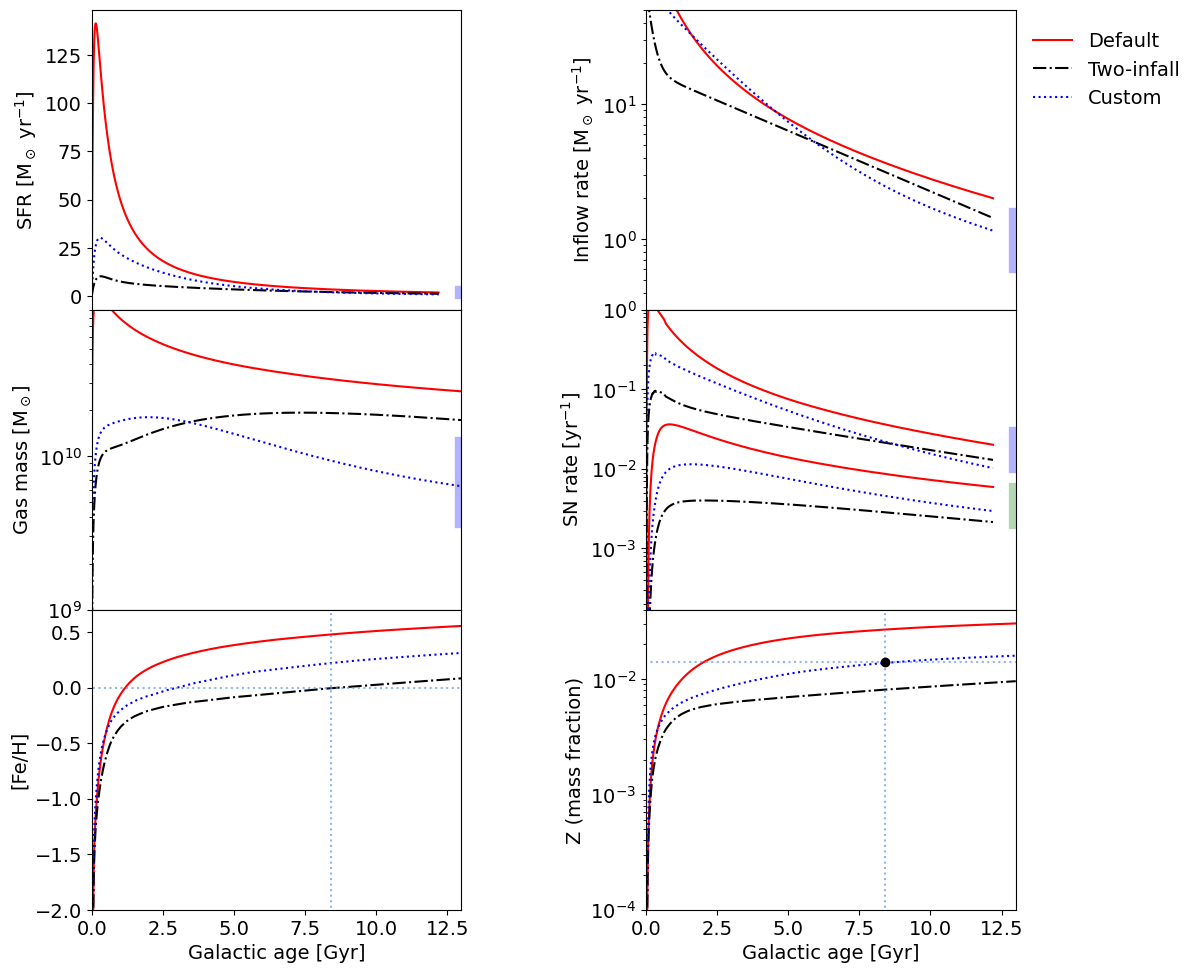

In [75]:
#%matplotlib nbagg

t_op = []
inflow_rate = []
m_gas = []
cc_sne_rate = []
Ia_sne_rate = []
m_star_lost =[]
i=0
j=0
k=0
for key,val in op_dict.items():    
    # OMEGA+ time array
    t_op.append(np.array(val.inner.history.age)/1.0e9)

    # Get the inflow rates [Msun/yr]
    inflow_rate.append(val.inner.m_inflow_t/list(op_dict.values())[0].inner.history.timesteps) 
    
    # Get the total mass of gas [Msun]
    m_gas.append([])
    m_gas[i] = np.zeros(val.inner.nb_timesteps+1)
    for i_t in range(val.inner.nb_timesteps+1):
        m_gas[i][i_t] = sum(val.inner.ymgal[i_t])
    i+=1
    
    # Get the total mass lost by stars [Msun]
    m_star_lost.append([])
    m_star_lost[j] = 0.0
    for i_t in range(val.inner.nb_timesteps):
        m_star_lost[j] += np.sum(val.inner.mdot[i_t])
    j+=1
    
    # Get the CC and Ia SNe rates [yr^-1]
    cc_sne_rate.append(val.inner.history.sn2_numbers[1:]/val.inner.history.timesteps) 
    Ia_sne_rate.append(val.inner.history.sn1a_numbers[1:]/val.inner.history.timesteps) 
    k+=1

plt.close()
# Figure frame
%matplotlib inline
al_f = 14 # text font
matplotlib.rcParams.update({'font.size': 14.})
f, axarr = plt.subplots(3, 2, figsize=(12,12), sharex=True, sharey=False) # [row][col]
f.subplots_adjust(hspace=0.)
f.subplots_adjust(wspace=0.5)
colors = ['r','k','blue','black'
         ]

linestyles = ['-','-.',':',':'
             ]

labels = []

# Plot SFR
i=0
axarr[0][0].plot([12.9,12.9], [0.65,3.0], linewidth=6, color='b', alpha=0.3)
for key,val in op_dict.items():
    axarr[0][0].plot(t_op[i][:-1], val.inner.history.sfr_abs[:-1], colors[i], ls=linestyles[i],linewidth=1.5)
    i+=1

# Plot inflows
i=0
axarr[0][1].plot([12.9,12.9], [0.6,1.6], linewidth=6, color='b', alpha=0.3)
for key,val in op_dict.items():
    axarr[0][1].plot(t_op[i][:-1], inflow_rate[i], colors[i],ls=linestyles[i], linewidth=1.5)
    i+=1
    
# Plot gas mass
i=0
axarr[1][0].plot([12.9,12.9], [3.6e9,12.6e9], linewidth=6, color='b', alpha=0.3)
for key,val in op_dict.items():
    axarr[1][0].plot(t_op[i], m_gas[i], colors[i],ls=linestyles[i], linewidth=1.5)
    i+=1
    
# Plot SNe rates
i=0
axarr[1][1].plot([12.9,12.9], [1e-2,3e-2], linewidth=6, color='b', alpha=0.3)
axarr[1][1].plot([12.9,12.9], [0.2e-2,0.6e-2], linewidth=6, color='g', alpha=0.3)
for key,val in op_dict.items():
    axarr[1][1].plot(t_op[i][:-1], cc_sne_rate[i], colors[i], ls=linestyles[i],linewidth=1.5)
    axarr[1][1].plot(t_op[i][:-1], Ia_sne_rate[i], colors[i], ls=linestyles[i],label=key, linewidth=1.5)
    i+=1
axarr[1][1].legend(frameon=False, loc='center left', bbox_to_anchor=(1, 1.8))
    
    
# Y-axis
axarr[0][0].set_ylabel('SFR [M$_\odot$ yr$^{-1}$]', fontsize=al_f)
axarr[0][1].set_ylabel('Inflow rate [M$_\odot$ yr$^{-1}$]', fontsize=al_f)
axarr[0][1].set_yscale('log')
axarr[0][1].set_ylim(3e-1,5e1)
axarr[1][0].set_ylabel('Gas mass [M$_\odot$]', fontsize=al_f)
axarr[1][0].set_yscale('log')
axarr[1][0].set_ylim(1e9,9e10)
axarr[1][1].set_ylabel('SN rate [yr$^{-1}$]', fontsize=al_f)
axarr[1][1].set_yscale('log')
axarr[1][1].set_ylim(1.7e-4,1e0)

# X-axis
axarr[1][1].set_xlim(0,13)



def plot_spectr(omega_run, solar_norm):
    return(omega_run.inner.plot_spectro(solar_norm=solar_norm, return_x_y=True))

time=[]
Fe=[]
# Extract predictions
for key, val in op_dict.items():
    time.append(plot_spectr(val, 'Lodders_et_al_2009')[0])
    Fe.append(plot_spectr(val, 'Lodders_et_al_2009')[1])

# Plot age-[Fe/H]
# ===============
i=0
for key, val in op_dict.items():
    axarr[2][0].plot(np.array(time[i])/1e9, Fe[i], colors[i], ls=linestyles[i], linewidth=1.5, label=key)
    i+=1

axarr[2][0].plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
axarr[2][0].plot([-1e10,1e10], [0,0], ':', color='cornflowerblue', alpha=0.7)
axarr[2][0].set_ylim(-2., 0.7)

i=0
for key, val in op_dict.items():
    axarr[2][1].plot(np.array(val.inner.history.age)/1e9, val.inner.history.metallicity, colors[i], ls=linestyles[i],linewidth=1.5)
    i+=1
           
axarr[2][1].plot([(13-4.6),(13-4.6)], [-10, 10], ':', color='cornflowerblue', alpha=0.7)
axarr[2][1].plot([-1e10,1e10], [0.014,0.014], ':', color='cornflowerblue', alpha=0.7)
axarr[2][1].set_yscale('log')
axarr[2][1].set_ylim(1e-4, 4e-2)
axarr[2][1].scatter([8.4],[0.014],color='k',zorder=10)

# Labels and visual aspect
axarr[2][0].set_ylabel('[Fe/H]', fontsize=al_f)
axarr[2][1].set_ylabel('Z (mass fraction)', fontsize=al_f)
axarr[2][1].set_xlabel('Galactic age [Gyr]', fontsize=al_f)
axarr[2][0].set_xlabel('Galactic age [Gyr]', fontsize=al_f)

# Adjust layout/white spaces
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.2)
plt.subplots_adjust(right=0.97)